#**Objetivo:** 

 


Objetivo:
Data storytelling es un enfoque estructurado para comunicar información sobre los datos, utilizando elementos narrativos y elementos visuales.
En este trabajo desarrollamos algunas hipotesis, las presentamos y las comprobamos.


## Librerias:

In [ ]:
import seaborn as sns
import pandas as pd
import missingno as msno
import numpy 
import matplotlib.pyplot       as plt
import matplotlib.pyplot       as plot


import numpy as np
%matplotlib inline
from google.colab import drive
import os
from datetime import date



In [ ]:
#install library
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#leer CSV dentro de un DataFrame
df=pd.read_csv('marketing_campaign.csv', sep=';')

In [ ]:
#numero de filas y columnas 
df.shape

(2240, 29)

In [ ]:
#informacion del data set, nulos y tipos de datos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

3 columnas son categoricas y el resto int.

La coulmna Income tiene nulos

### Transformaciones: 

Hay 24 valores nulos los cuales se podrias eliminar las filas o reemplazarlas por la media.

In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

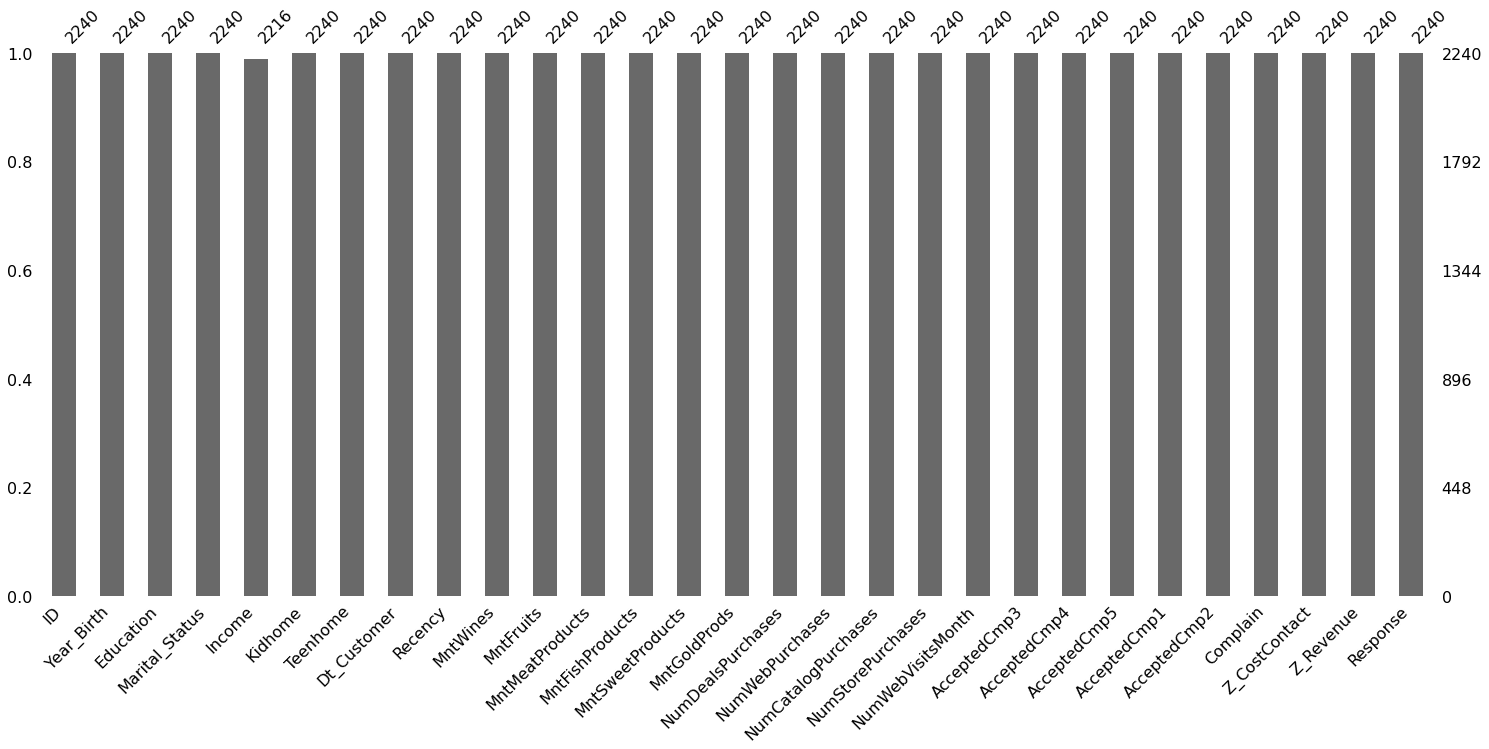

In [ ]:
#Viasualizamos graficamente la columna con nulos. 
msno.bar(df);


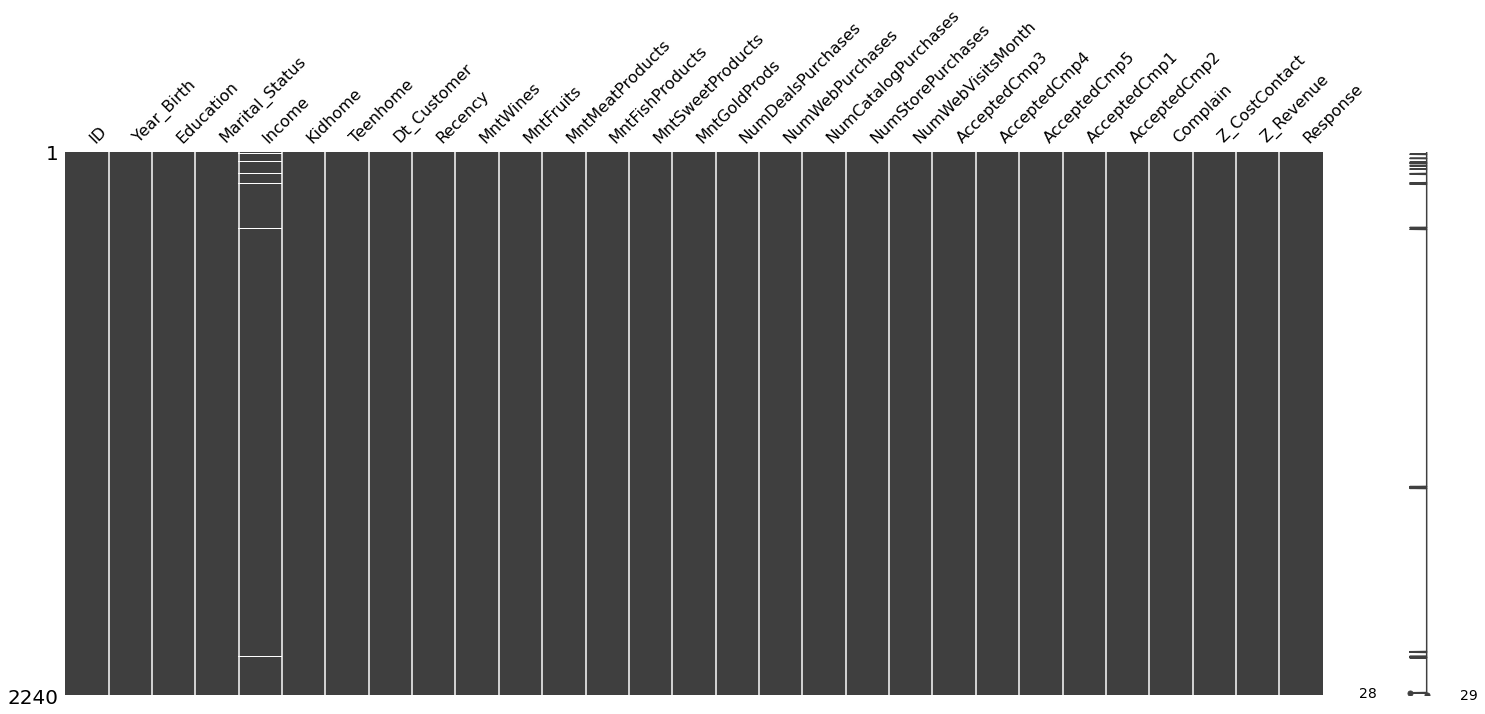

In [ ]:
#Vemos en esta grafica donde esta los valores nulos. 
msno.matrix(df)

Como hay una solo columna con nulos no podemos visualizar si tiene correlacion con otra columna de nulos. 
msno.heatmap(df)

In [ ]:
# Columnas con porcentaje de nulos
pd.set_option('display.max_rows', None)  # or 1000
serie=(df.isnull().sum()/df.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

Income    1.071429
dtype: float64

In [ ]:
#reemplazo los nulos por la media
df.fillna(df.Income.mean(),inplace=True)


In [ ]:
#Sin nulos
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

(0.0, 2239.0)

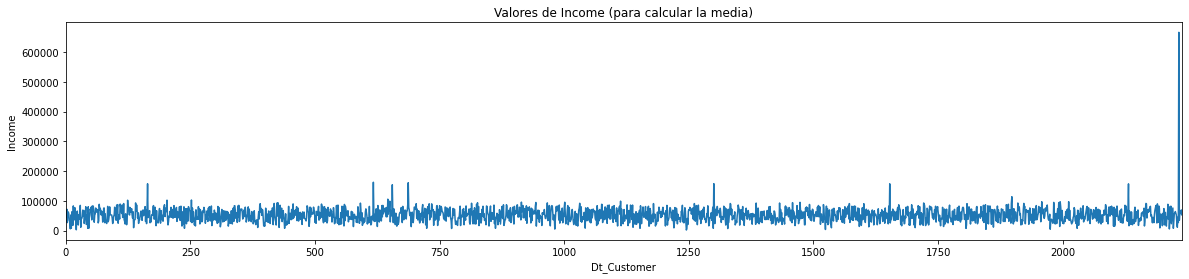

In [ ]:
#Pruebamos valores outlier 
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(df.index, df.Income.values, label='Consulto los valores de Income para calcular la media')
ax.set_title('Valores de Income (para calcular la media)')
ax.set_xlabel('Dt_Customer')
ax.set_ylabel('Income')
ax.set_xlim(df.index[0], df.index[-1])
#ax.legend();

In [ ]:
df = df[df.Income < 120000]
#dejo solo los menores de 120000

(0.0, 2239.0)

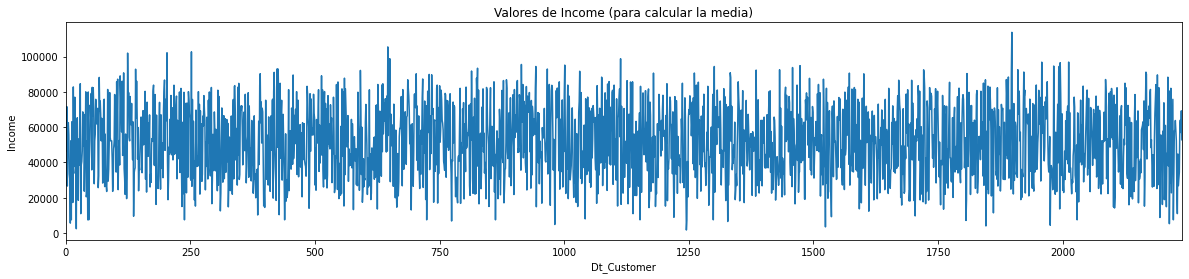

In [ ]:
#compruebo que ya no tengo valores atipicos 
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(df.index, df.Income.values, label='Consulto los valores de Income para calcular la media')
ax.set_title('Valores de Income (para calcular la media)')
ax.set_xlabel('Dt_Customer')
ax.set_ylabel('Income')
ax.set_xlim(df.index[0], df.index[-1])
#ax.legend();

In [ ]:
df= df.drop(['ID'], axis=1)
#eliminamos la columna id por que no es representativa para el analisis

(0.0, 2239.0)

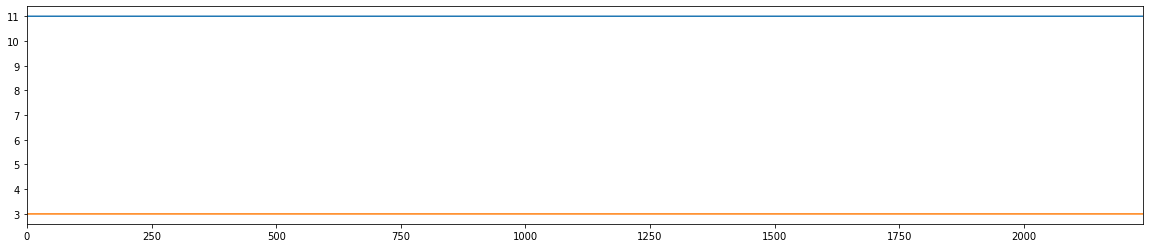

In [ ]:
#Elimino las columnas Z_Revenue y Z_CostContact que son constantes 
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(df.index, df.Z_Revenue.values, label='Consulto los valores de Revenue')
ax.plot(df.index, df.Z_CostContact.values, label='Consulto los valores de Revenue')

ax.set_xlim(df.index[0], df.index[-1])
#ax.legend();

In [ ]:
df= df.drop(['Z_Revenue'], axis=1)

In [ ]:
df= df.drop(['Z_CostContact'], axis=1)

In [ ]:
#Verificamos duplicados. Hay 26 filas, pero por su contenido es valido que se dupliquen.
print(df.shape)

(2232, 26)


In [ ]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'], format='%d/%m/%Y')
#la columna Dt_Customer la transformo a tipo de datos fecha

Como tenemos el año de nacimiento vamos a calcular la edad para poder hacer análisis de esta variable.


In [ ]:
today=date.today()
df['EDAD']=today.year - df['Year_Birth']

In [ ]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,EDAD
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,4,7,0,0,0,0,0,0,1,66
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,2,5,0,0,0,0,0,0,0,69
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,10,4,0,0,0,0,0,0,0,58
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,4,6,0,0,0,0,0,0,0,39
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,6,5,0,0,0,0,0,0,0,42


In [ ]:
df.loc[df['EDAD'] >=100, 'EDAD'] = 100

## StoryTelling 1: 

EDAD vs GASTOS: ¿La edad de los consumidores influye en la cantidad de compras y en la cantidad de Gastos?

Dentro de las diferentes variables que afectan el comportamiento del consumidor se presenta la **edad** como una variable relevante para la segmentación de mercados, debido a que demarca las diferentes etapas de su vida desde la niñez hasta la vejez, que traen consigo características físicas y biológicas, psicológicas, sociales, situacionales, entre otras; las que influyen en su comportamiento en relación con el **consumo y preferencias por marcas y productos**. 

Por tal motivo, resulta de interés investigar si en la muestra bajo estudio se presenta un patrón de interes en cuanto a la relación EDAD vs monto total gastado. 

In [ ]:
#sumamos todos los tipos de gastos en una unica variable.
df['Mnt_total'] = df['MntWines'] + df['MntFruits'] +df['MntMeatProducts'] +df['MntFishProducts'] +df['MntSweetProducts'] +df['MntGoldProds']

In [ ]:
conditionlist = [
    (df['EDAD'] >= 60) ,
    (df['EDAD'] > 40) & (df['EDAD'] <60),
    (df['EDAD'] <= 40)]
choicelist = ['Adulto mayor', 'Adulto', 'joven']
df['Etapa'] = np.select(conditionlist, choicelist, default='Not Specified')

In [ ]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,EDAD,Mnt_total,Etapa
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,0,1,66,1617,Adulto mayor
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,0,69,27,Adulto mayor
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,0,58,776,Adulto
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,0,39,53,joven
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,0,42,422,Adulto


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


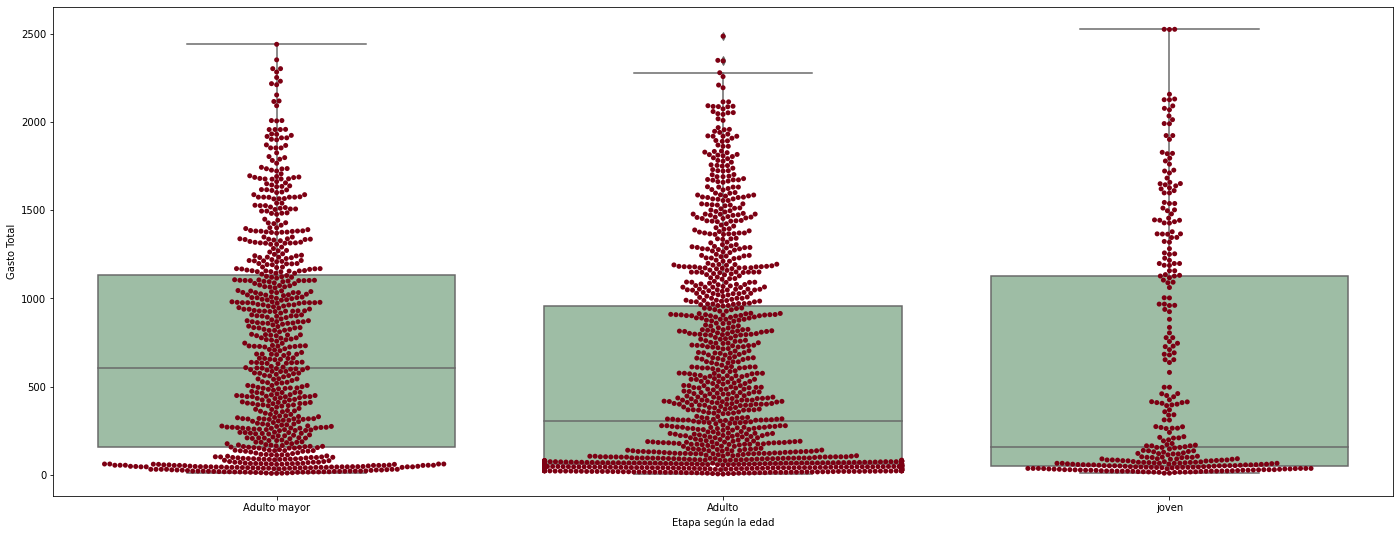

In [ ]:
#mostramos para cada edad su media y DISPERSIÓN de los gastos.
f, ax = plt.subplots(figsize=(24, 9))

ax = sns.boxplot(x='Etapa', y = 'Mnt_total', data = df, color='#99c2a2')
ax = sns.swarmplot(x='Etapa', y = 'Mnt_total', data = df , color='#7d0013', dodge = True)
ax.set_ylabel('Gasto Total')
ax.set_xlabel('Etapa según la edad')
plt.show()

La media más alta es en la etapa adulta mayor.


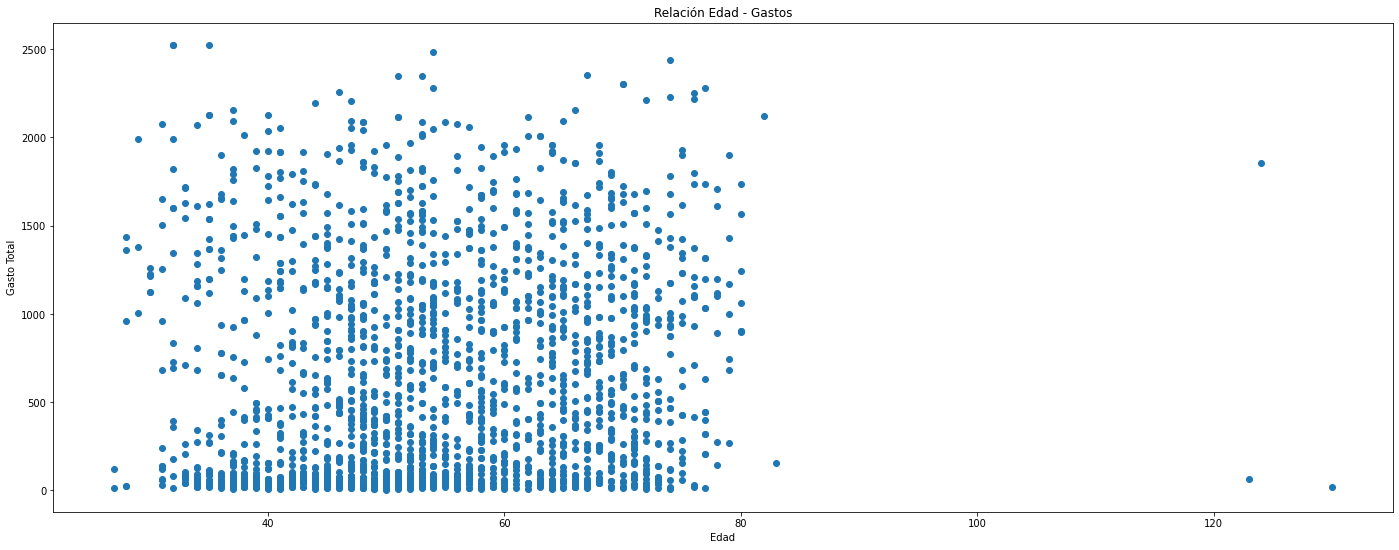

In [ ]:
#mostramos la DISPERSIÓN de los gastos por edad
f, ax = plt.subplots(figsize=(24, 9))
x = df['EDAD']
y = df['Mnt_total']
ax.set_ylabel('Gasto Total')
ax.set_xlabel('Edad')
plt.title("Relación Edad - Gastos")
plt.scatter(x, y)

In [ ]:
#vamos a agrupar por edad y sumar el gasto total de cada edad.
df2 = df[['Mnt_total','Etapa']]

In [ ]:
agg = df2.groupby('Etapa').agg([np.sum])
agg


,Mnt_total
,sum
Etapa,
Adulto,652222
Adulto mayor,528864
joven,170605


In [ ]:
agg3= df2.groupby('Etapa').agg([np.mean])

In [ ]:
agg.columns = ['Gastototal']

In [ ]:
agg3.columns = ['Gastototal']

Text(0.5, 1.0, 'Relación Gastos de total y edad')

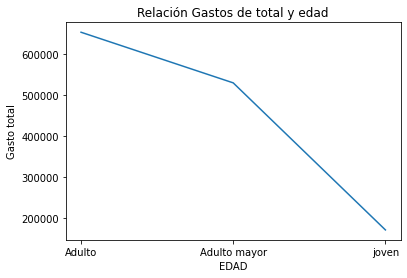

In [ ]:
# Datos
x = agg.index
y = agg['Gastototal']

# Gráfico de líneas
fig, ax = plt.subplots()
ax.plot(x, y)


ax.set_ylabel('Gasto total')
ax.set_xlabel('EDAD')
plt.title("Relación Gastos de total y edad")
#vemos la evolución del gasto a medida que aumenta la edad.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Relación Gastos de total y edad')

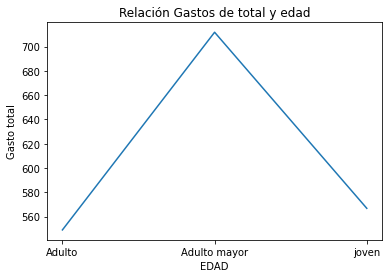

In [ ]:
x = agg3.index
y = agg3['Gastototal']

# Gráfico de líneas
fig, ax = plt.subplots()
ax.plot(x, y)


ax.set_ylabel('Gasto total')
ax.set_xlabel('EDAD')
plt.title("Relación Gastos de total y edad")
# La media de la etapa joven es alta por que hay pocos valores y uno de ellos es muy alto 

Segun informes del ClearScore los consumidores que están en la décadas de los 40 a 80 años son los que más gastan en productos alimenticios. 

**Segun nuestra muestra se refleja este comportamiento** tanto en la cantidad gastada como en la cantidad de compras realizadas. 

Si bien la **cantidad de compras** es alto entre los 40 y 60 (seguramente tenga que ver con la cantidad y edad de los hijos que posean). 
Entre los 60 y 80 el **importe de compras** es tambien elevado ya que este grupo se inclinan por consumos más vinculados al hogar, ya sea para comer, salud o la mantención de la casa (según el informe de la CCS), esto se debe al importante aumento de la esperanza de vida y el gradual envejecimiento que influyen en la calidad de la alimentación.


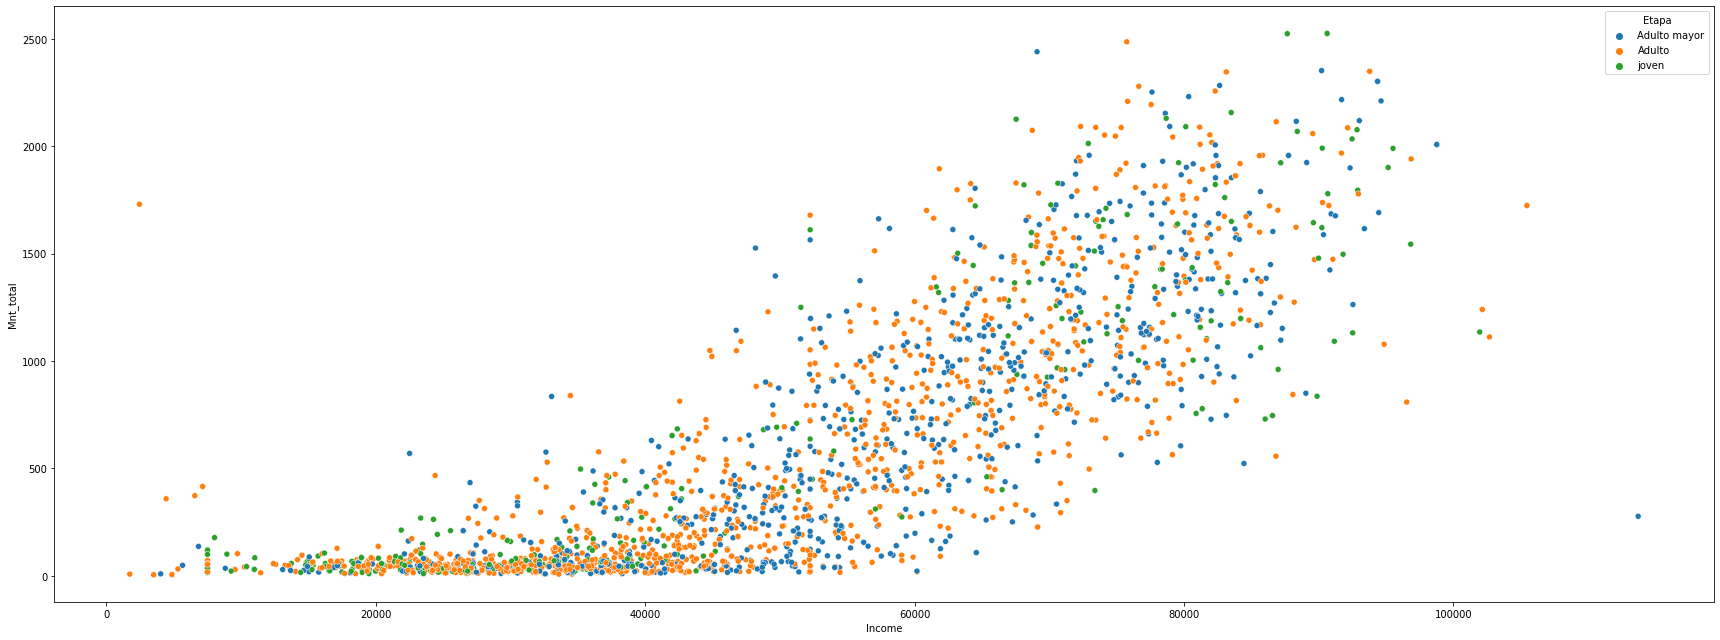

In [ ]:
f, ax = plt.subplots(figsize=(24, 9))
sns.scatterplot(x='Income', y='Mnt_total', hue='Etapa', data=df);
f.tight_layout()

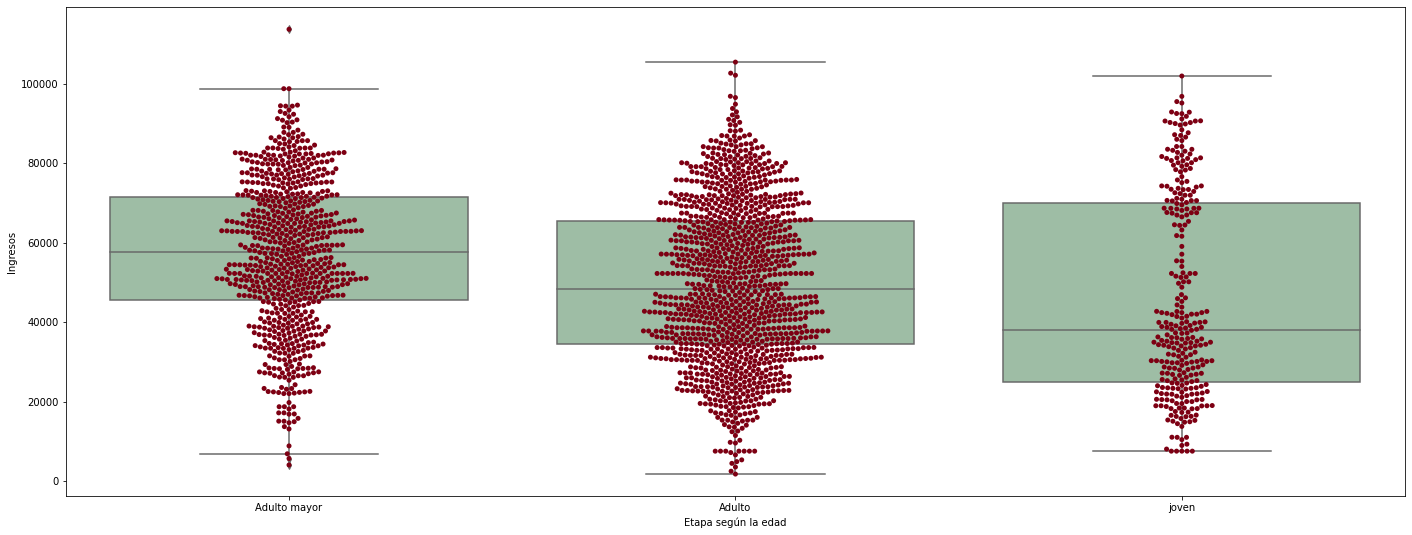

In [ ]:
f, ax = plt.subplots(figsize=(24, 9))

ax = sns.boxplot(x='Etapa', y = 'Income', data = df, color='#99c2a2')
ax = sns.swarmplot(x='Etapa', y = 'Income', data = df , color='#7d0013', dodge = True)
ax.set_ylabel('Ingresos')
ax.set_xlabel('Etapa según la edad')
plt.show()

El mayor consumo de los "Adultos mayor" puede que coincida con los ingresos, donde vemos que la media es mayor a la de los adultos y los jovenes. 
Esta muestra evidentemente no es de Argentina. 
Del primer grafico tambien vemos la correlacion en general entre los consumos y los ingresos. 

## StoryTelling 2: 

¿Existe una relación entre la **cantidad de compras de carne** segun tenga hijos pequeños o **adolecentes**?

Los verdaderos gastos llegan con los hijos adolescentes. En este caso analizaremos con gastos puntuales en carne, pero en general las personas consumen mas alimentos en esta edad. Porque son más activos que los adultos y porque también están creciendo.

Los padres de adolescentes ya tienen pruebas para respaldar la afirmación de que alimentar a sus hijos puede costar una fortuna, después de que un estudio en los EEUU concluyó que los niños de entre 14 y 17 años comerían un almuerzo de 2.000 calorías si pudieran.



In [ ]:
Kidhome = df[['MntMeatProducts','Kidhome']]

In [ ]:
Kidhome =Kidhome[(Kidhome.Kidhome>0)] 

In [ ]:
Teenhome=df[['MntMeatProducts','Teenhome']]

In [ ]:
Teenhome =Teenhome[(Teenhome.Teenhome>0)] 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Relación Gastos de Carne con Respecto a hijos pequeños y adolecentes')

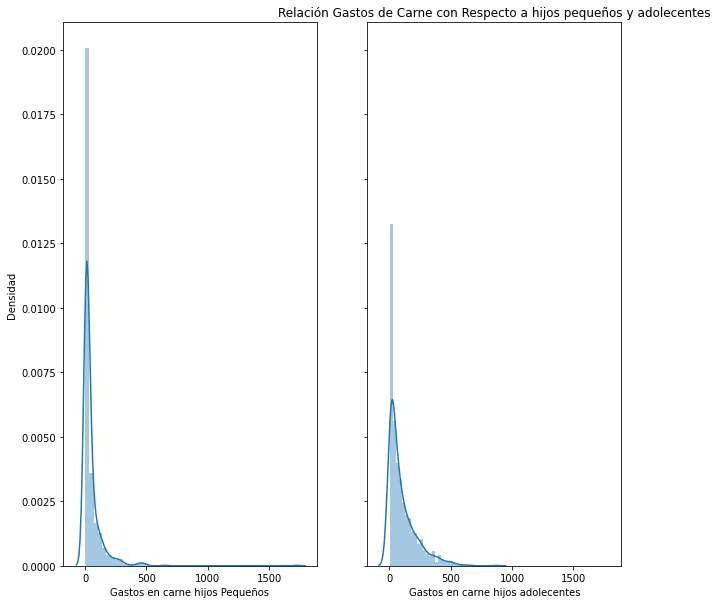

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(10, 10), gridspec_kw=dict(width_ratios=[4, 4]), sharex=True, sharey=True )
sns.distplot(Kidhome['MntMeatProducts'], ax=axs[0])
sns.distplot(Teenhome['MntMeatProducts'], ax=axs[1])

axs[0].set_ylabel('Densidad')
axs[0].set_xlabel('Gastos en carne hijos Pequeños')
axs[1].set_ylabel('Densidad')
axs[1].set_xlabel('Gastos en carne hijos adolecentes')
plt.title("Relación Gastos de Carne con Respecto a hijos pequeños y adolecentes")

Podemos ver que hay mayor densidad de compras en el dataframe de padres con hijos adolescentes.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


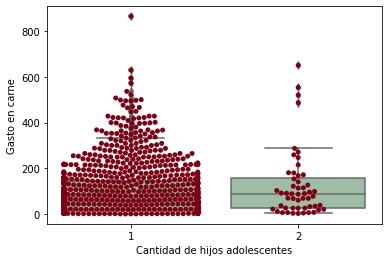

In [ ]:
fig, ax = plt.subplots()
ax = sns.boxplot(x='Teenhome', y = 'MntMeatProducts', data = Teenhome, color='#99c2a2')
ax = sns.swarmplot(x='Teenhome', y = 'MntMeatProducts', data = Teenhome , color='#7d0013', dodge = True)
ax.set_ylabel('Gasto en carne')
ax.set_xlabel('Cantidad de hijos adolescentes')
plt.show()

En cuanto a profundizar para ver si influye la cantidad de hijos adolescentes en los gastos en carne no lo podemos hacer por la poca cantidad de datos (de la muestra) en el grupo de mas de 2 hijos. 

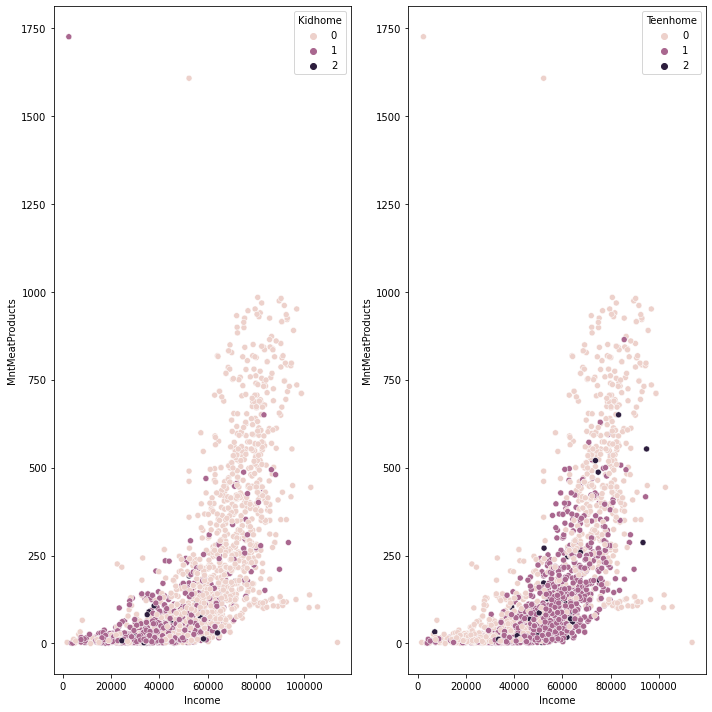

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(10, 10), gridspec_kw=dict(width_ratios=[4, 4]))
sns.scatterplot(x='Income', y='MntMeatProducts', hue='Kidhome', data=df, ax=axs[0]);
sns.scatterplot(x='Income', y='MntMeatProducts', hue='Teenhome', data=df, ax=axs[1]);
f.tight_layout()

Los que tienen hijos adolecentes compran mas carne que los que tienen hijos pequeños. 

Tambien Se observa esta tendencia cuando cobran entre 40000 y 60000 pesos (Y es por que ahí esta la mediana) y gastan en carne entre 0 a 600 pesos (en mayor cantidad). Por el contrario, los que poseen niños pequeños compan entre 0 a 200 pesos en carne. 
Esta misma tendencia se observa para los otros tipos de compras también.

## StoryTelling 3: 

¿Existe una relación entre el **importe gastado en golosinas** y la cantidad de hijos sean **niños** y **adolecentes**?

Conocer e interpretar el perfil de los clientes siempre ha sido uno de los objetivos del área comercial y de marketing de las empresas. Tomando esto en consideración, resulta relevante conocer si en nuestra data  existe una relación en el gasto que tienen los clientes en la compra de golosinas con la cantidad de hijos que tenga el grupo familiar. 

Se puede llegar a suponer que aquellas familias que tengan hijos (adolescentes o niños) puede tener un consumo mayor en dulces que aquellos que no tengan hijos. 


In [ ]:
#sumanos la cantidad de hijos entre niños y adolescentes
df['Hijos_totales'] = df['Kidhome'] + df['Kidhome'] 

In [ ]:
#relación entre el gasto realizado en dulces con la cantidad de hijos
tabla = df.pivot_table(index='Hijos_totales', values = ['MntSweetProducts'], aggfunc = 'sum' )
tabla

,MntSweetProducts
Hijos_totales,
0,52357
2,8028
4,226


In [ ]:
#la tabla anterior nos muestra que el mayor gasto lo realiza las familias sin hijos. 
tabla.max().max()

52357

In [ ]:
#dado el resultado anterior, comprobamos que exista una correlación negativa entre ambas variables 
correlacion=df.corr()
correlacion.loc["Hijos_totales", "MntSweetProducts"]

-0.37173499594293735

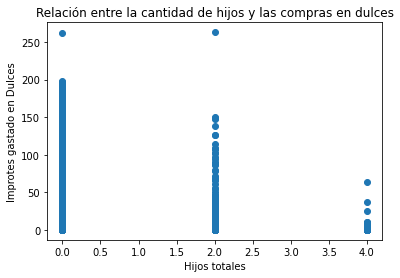

In [ ]:
plt.plot( 'Hijos_totales', 'MntSweetProducts', data=df, linestyle='none', marker='o')
plt.title('Relación entre la cantidad de hijos y las compras en dulces')
plt.xlabel('Hijos totales')
plt.ylabel('Improtes gastado en Dulces')
plt.show()

Dado que existe una correlación negativa entre las variables, se concluye que a medida que se tengan menos hijos el importe gastado en dulces es mayor que aquellas familas que tienen 2 o 4 hijos. 

# Insights

## Análisis univariado 

In [ ]:
df.describe(include='all').T

<ipython-input-50-0dd56a246831>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Year_Birth,2232.0,NaN,NaN,NaN,NaT,NaT,1968.792563,11.99034,1893.0,1959.0,1970.0,1977.0,1996.0
Education,2232,5,Graduation,1124,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2232,8,Married,861,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2232.0,NaN,NaN,NaN,NaT,NaT,51640.236126,20601.760369,1730.0,35434.75,51566.0,68118.0,113734.0
Kidhome,2232.0,NaN,NaN,NaN,NaT,NaT,0.444444,0.538567,0.0,0.0,0.0,1.0,2.0
Teenhome,2232.0,NaN,NaN,NaN,NaT,NaT,0.507168,0.54468,0.0,0.0,0.0,1.0,2.0
Dt_Customer,2232,663,2012-08-31 00:00:00,12,2012-07-30,2014-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2232.0,NaN,NaN,NaN,NaT,NaT,49.111111,28.952893,0.0,24.0,49.0,74.0,99.0
MntWines,2232.0,NaN,NaN,NaN,NaT,NaT,304.930108,336.78495,0.0,24.0,176.0,505.0,1493.0
MntFruits,2232.0,NaN,NaN,NaN,NaT,NaT,26.380376,39.821532,0.0,2.0,8.0,33.0,199.0


In [ ]:
from pandas.api.types import is_numeric_dtype
import numpy as np


def univariado_info(df):
  '''Calculo de informacion estadistias y genericas de cada columna de un dataframe'''

  #create a dataframe with especificas columnas

  df_info = pd.DataFrame(columns=['Cantidad', 'Tipo' , 'Missing', 'Unicos', 'Numeric'])
  #loop de todas las variables del dataframe
  for col in df:

      #obtengo info de la columna
      data_series = df[col]
      #lleno dataframe con las columnas iniciales
      df_info.loc[col] = [data_series.count(), data_series.dtype, data_series.isnull().sum(), data_series.nunique(), is_numeric_dtype(data_series)]

  #calculo el describe 
  df_describe = df.describe(include='all').T[['top', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
  #calculo sesgo y curtosis
  df_stats = pd.DataFrame([df.skew(), df.kurtosis()], index=['sesgo', 'kurt']).T

  return pd.concat([df_info,pd.concat([df_describe, df_stats], axis=1)], axis=1).fillna('-')


df_uni_stats = univariado_info(df)
df_uni_stats

<ipython-input-51-945ec96f9c52>:20: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_describe = df.describe(include='all').T[['top', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
<ipython-input-51-945ec96f9c52>:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_stats = pd.DataFrame([df.skew(), df.kurtosis()], index=['sesgo', 'kurt']).T


,Cantidad,Tipo,Missing,Unicos,Numeric,top,mean,std,min,25%,50%,75%,max,sesgo,kurt
Year_Birth,2232,int64,0,59,True,-,1968.792563,11.99034,1893.0,1959.0,1970.0,1977.0,1996.0,-0.346376,0.717186
Education,2232,object,0,5,False,Graduation,-,-,-,-,-,-,-,-,-
Marital_Status,2232,object,0,8,False,Married,-,-,-,-,-,-,-,-,-
Income,2232,float64,0,1967,True,-,51640.236126,20601.760369,1730.0,35434.75,51566.0,68118.0,113734.0,0.0121,-0.824592
Kidhome,2232,int64,0,3,True,-,0.444444,0.538567,0.0,0.0,0.0,1.0,2.0,0.635366,-0.778218
Teenhome,2232,int64,0,3,True,-,0.507168,0.54468,0.0,0.0,0.0,1.0,2.0,0.404686,-0.986476
Dt_Customer,2232,datetime64[ns],0,663,False,2012-08-31 00:00:00,-,-,-,-,-,-,-,-,-
Recency,2232,int64,0,100,True,-,49.111111,28.952893,0.0,24.0,49.0,74.0,99.0,-0.004038,-1.200285
MntWines,2232,int64,0,776,True,-,304.930108,336.78495,0.0,24.0,176.0,505.0,1493.0,1.171224,0.587968
MntFruits,2232,int64,0,158,True,-,26.380376,39.821532,0.0,2.0,8.0,33.0,199.0,2.096793,4.025224


Podemos ver desde esta información:

Income: esta muy distribuido.

Hijos_totales: en esta muestra, solo poseen una cantidad de: 0, 2 0 4 hijos. por que hay tres valores distintos, el max en 4 y el min es 0

Los Gastos tambien estan distribuidos con muchoas valores distintos. 

Las Purchases (compras) poseen valores continuos

Son Variables categoricas: Etapa, Education, Marital_Status

In [ ]:
!pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sidetable
df.stb.freq(['Education'])

,Education,count,percent,cumulative_count,cumulative_percent
0,Graduation,1124,50.358423,1124,50.358423
1,PhD,482,21.594982,1606,71.953405
2,Master,369,16.532258,1975,88.485663
3,2n Cycle,203,9.094982,2178,97.580645
4,Basic,54,2.419355,2232,100.000000


Son muy pocos registros con el nivel Basic

In [ ]:
import sidetable
df.stb.freq(['Etapa'])

,Etapa,count,percent,cumulative_count,cumulative_percent
0,Adulto,1188,53.225806,1188,53.225806
1,Adulto mayor,743,33.288530,1931,86.514337
2,joven,301,13.485663,2232,100.000000


La mayoria son adultos

In [ ]:
import sidetable
df.stb.freq(['Marital_Status'])

,Marital_Status,count,percent,cumulative_count,cumulative_percent
0,Married,861,38.575269,861,38.575269
1,Together,576,25.806452,1437,64.381720
2,Single,480,21.505376,1917,85.887097
3,Divorced,231,10.349462,2148,96.236559
4,Widow,77,3.449821,2225,99.686380
5,Alone,3,0.134409,2228,99.820789
6,YOLO,2,0.089606,2230,99.910394
7,Absurd,2,0.089606,2232,100.000000


Los ultimos tres tipos Alone , YOLO y Absurd. Parecen ser datos basura o desnormalizado.

In [ ]:
#tabla de frecuencias custom
import math

def sturges_intervals(data):
  #sturges rules to select bin
  k = 1 + 3.322 * math.log10(len(data))
  periodos = math.ceil(k)

  #generacion de intervalos en base al rango y periodo
  intervals = pd.interval_range(
      start=data.min(),
      end=data.max() + 1,
      periods=k,
      name="Intervalo",
      closed="left")
  
  #redondeo de los valores de corte
  inter = pd.IntervalIndex([
    pd.Interval( round(i.left,1), round(i.right,1), i.closed )
    for i in intervals])
  
  return inter, periodos


def freq_table(df, col, with_cuts=True):

  #seleccion de data
  data = df[col]

  #verificacion de columna y si queremos cortes de intervalos
  if not is_numeric_dtype(data) or not with_cuts:
    #generaion de tabla de frecuenca ,con info absoluta
    freq_tab = pd.crosstab(data, columns='FreqAbs').sort_values('FreqAbs', ascending=False)
  
  else:

    #generacion de dataframe con cortes
    freq_tab = pd.DataFrame(index=sturges_intervals(data)[0])
    freq_tab["FreqAbs"] = pd.cut(data, bins=freq_tab.index).value_counts()
    freq_tab["Marca"]  = freq_tab.index.mid

    freq_tab["LimInf"] = freq_tab.index.left
    freq_tab["LimSup"] = freq_tab.index.right

  
  #calculo del resto de la tabla de frecuencia
  freq_tab['FreqRel'] = freq_tab['FreqAbs'] / freq_tab['FreqAbs'].sum()
  freq_tab[['FAbsAcumulada', 'FAbsRelativa']] = freq_tab[['FreqAbs','FreqRel']].cumsum()
  return freq_tab

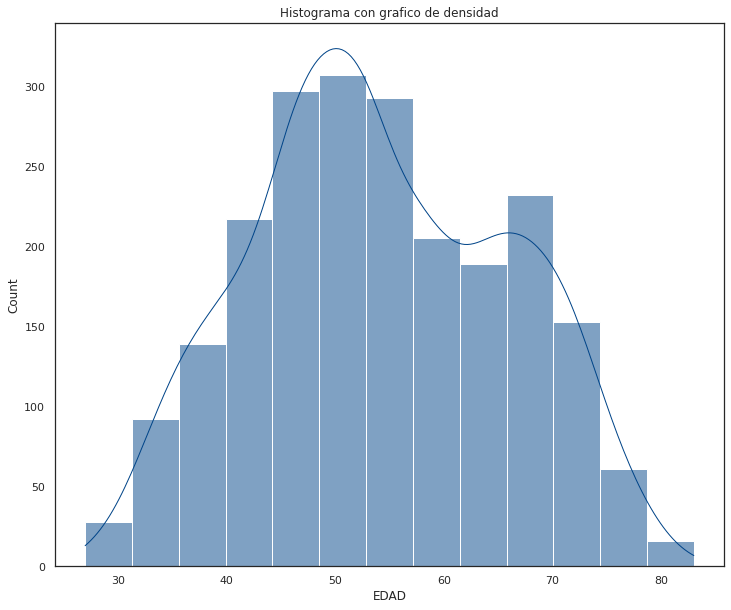

In [ ]:
sns.set(style="white", rc={"lines.linewidth": 1})
fig, axes = plt.subplots(figsize=(12,10))
sns.histplot(x='EDAD',
            data=df[df['EDAD']<100] ,
            color='#004488',
            ax=axes,
            bins= sturges_intervals(df['EDAD'])[1],
            kde=True).set(title='Histograma con grafico de densidad');

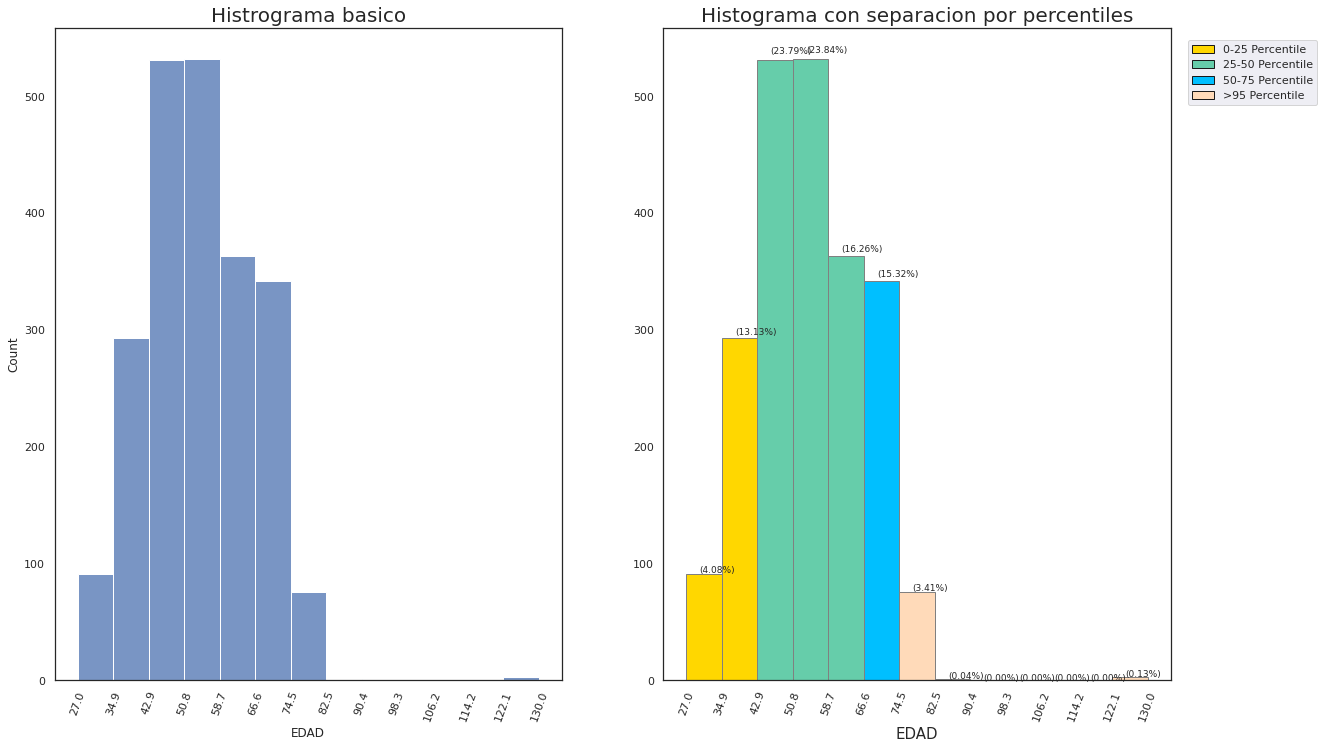

In [ ]:
#grafico numerico categorico
from matplotlib.patches import Rectangle
import numpy as np
fig , axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(20,12))

#grafico basico
sns.set_theme(rc={"font.size":9,"axes.titlesize":20,"axes.labelsize":15})
sns.histplot(data=df, x='EDAD', ax=axes[0], bins='sturges').set(title='Histrograma basico', );
axes[0].tick_params(axis='x', rotation=70)




# Extraccion de la variable
data = df['EDAD']

# Cambio de colores por percentil
perc_25_colour = 'gold'
perc_50_colour = 'mediumaquamarine'
perc_75_colour = 'deepskyblue'
perc_95_colour = 'peachpuff'

#generacion de grafico en base a sturges
counts, bins, patches = axes[1].hist(data, facecolor=perc_50_colour, edgecolor='gray', bins='sturges')

#seteo de la variable x en su anotacion
axes[1].set_xticks(bins.round(2))
plt.xticks(rotation=70)

# Genereo titulo y nombre de eje
plt.title('Histograma con separacion por percentiles', fontsize=20)
plt.xlabel('EDAD', fontsize=15)

#calculo de percentiles
q25, q75, q95 = np.percentile(data, [25, 75, 95])

#asignacion de colores segun barra y los valores de los percentiles
for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
    if rightside <= q25:
        patch.set_facecolor(perc_25_colour)
    elif leftside > q95:
        patch.set_facecolor(perc_95_colour)
    elif leftside >= q75:
        patch.set_facecolor(perc_75_colour)

# ubicaion central de los eje de la barras x
bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]

# display de las anotaciones de cada barra en porcentaje
for i in range(len(bins)-1):
    bin_label = "({0:,.2f}%)".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i]- 1, counts[i]*1.01, bin_label, rotation_mode='anchor')

#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [perc_25_colour, perc_50_colour, perc_75_colour, perc_95_colour]]
labels= ["0-25 Percentile","25-50 Percentile", "50-75 Percentile", ">95 Percentile"]
plt.legend(handles, labels, bbox_to_anchor=(0.5, 0., 0.80, 0.99))

La mayoria de las personas en la muestra poseen entre 44 y 55 años.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


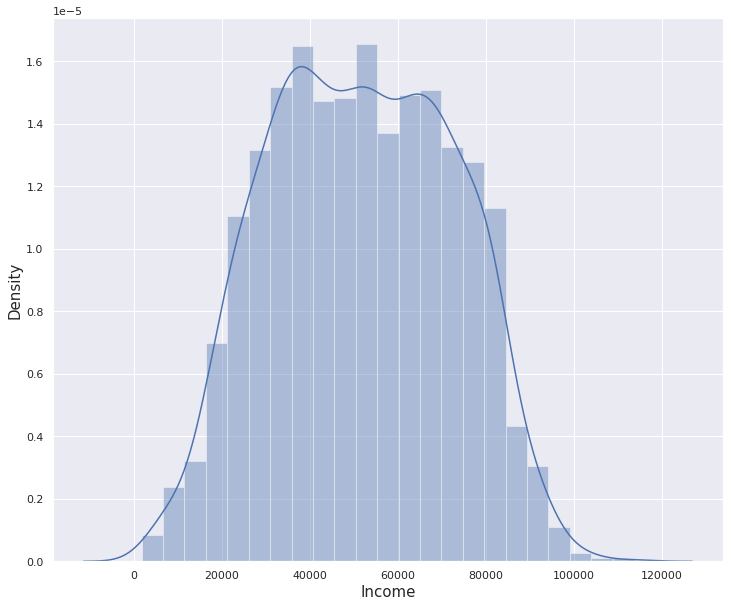

In [ ]:
fig, axes = plt.subplots(figsize=(12,10))
sns.distplot(df['Income']);

Los ingresos tienen una distribucion del tipo meseta

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


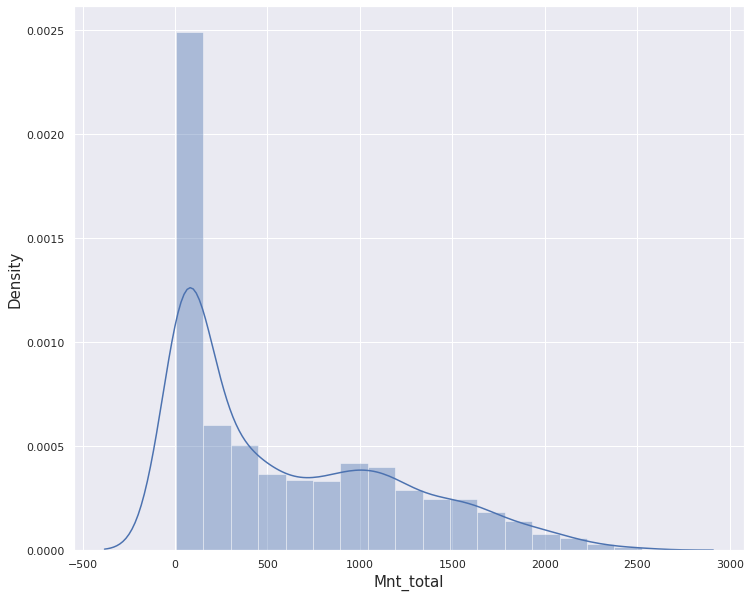

In [ ]:
fig, axes = plt.subplots(figsize=(12,10))
sns.distplot(df['Mnt_total']);

La mayoria no gasta o esta muy cerca de 0.

# Insights
## Análisis Bivariado

¿Existe relación entre como **realizan los clientes las compras (web, tienda física o catálogo) y el número de hijos que tienen**? Se puede llegar a pensar que los clientes que tienen hijos, van a preferir comprar por la web o catálogo para ahorrar tiempo. 


En la sección de transformaciones se demuestra que no hay nulos en las variables NumWebPurchases, NumCatalogPurchases, NumCatalogPurchases, Kidhome más Teenhome y, a su vez, todas las variables son números enteros

In [ ]:
#describiendo la información sobre la cantidad de hijos totales de los clientes y la cantidad de compras realizaadas por la web
df[["Hijos_totales","NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].describe(include="all")


,Hijos_totales,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2232.000000,2232.000000,2232.000000,2232.000000
mean,0.888889,4.097670,2.636201,5.808244
std,1.077134,2.774726,2.795959,3.242198
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000
50%,0.000000,4.000000,2.000000,5.000000
75%,2.000000,6.000000,4.000000,8.000000
max,4.000000,27.000000,28.000000,13.000000


De una muesta de 2.232 clientes y donde se asume que ambas variables son cuantitativas discretas, se observa para cada una de las variables: 

1. Hijos totales:  Los clientes tienen desde 0 hasta 3 hijos donde en promedio tienen 1 hijo por persona. El 75% y el 50% de los datos muestra que los clientes tienen entre 1 hijo o menos. 

2. NumWebPurchases: Los clientes realizan en promedio 4 compras en la web donde 27 compras es la mayor transacción que ha logrado la empresa en las ventas online. El 75% de los datos muestra que las compras realizadas por la web es menor que o igual a 6, el 50% es menor que o igual a 4 y el 25% a 2. 

3. NumCatalogPurchases:Los clientes realizan en promedio 3 compras por catálogo  donde 28 compras es la mayor transacción que ha logrado la empresa en este tipo de ventas. El 75% de los datos muestra que las compras realizadas por la web es menor que o igual a 4 y el 50% es menor que o igual a 2. 

4. NumStorePurchases: Los clientes realizan en promedio 6 compras por catálogo  donde 13 compras es la mayor transacción que ha logrado la empresa en este tipo de ventas. El 75% de los datos muestra que las compras realizadas por la web es menor que o igual a 8, el 50% es menor que o igual a 5 y el 25% menor o igual a 3.

Para los 3 tipos de compras se observan que los clientes pueden no llegar a comprar bajo ninguna modalidad y que hay clientes que no tienen hijos. 

In [ ]:
#estudiamos la correlación
corr_matrix = df.corr(method='spearman')
corr_matrix.loc[ 'Hijos_totales'	, ['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']]


NumWebPurchases       -0.426001
NumStorePurchases     -0.561370
NumCatalogPurchases   -0.598140
Name: Hijos_totales, dtype: float64

Existe una correlación negativa entre los clientes que tienen hijos y las compras realizadas por la web, tienda física y catálogo.

Text(0.5, 1.02, 'Relación entre hijos con las compras realizadas en locales, web y catálogo')

<Figure size 1008x1008 with 0 Axes>

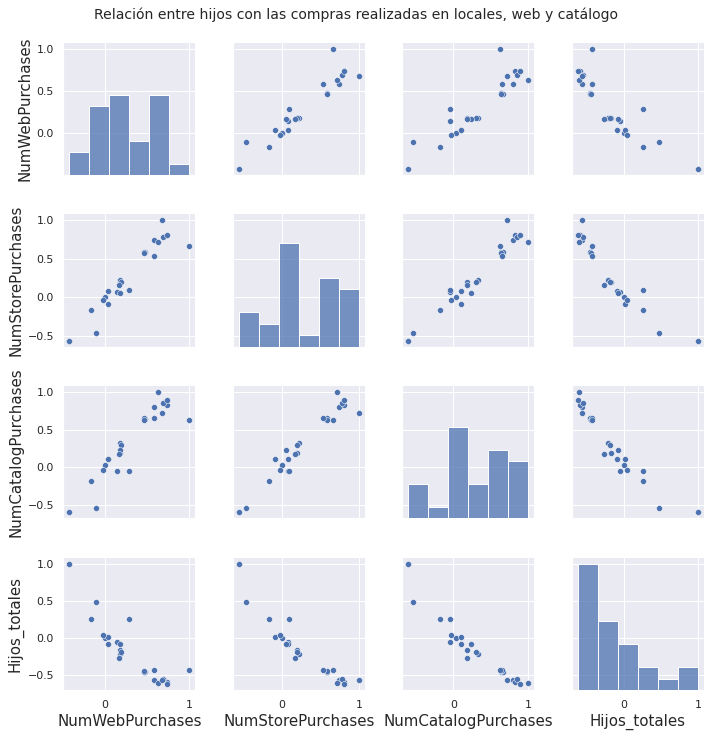

In [ ]:
#graficando 
plt.figure(figsize=(14,14))
graf_corr=sns.pairplot(corr_matrix[['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases','Hijos_totales']]);
graf_corr.fig.suptitle("Relación entre hijos con las compras realizadas en locales, web y catálogo", fontsize=14, y=1.02)

Se concluye que el número de compras realizadas en la web o catálogo no tienden a incrementarse al tener los clientes uno o más hijos. ¿Podemos decir entonces que las compras están relacionadas con los números de descuentos?

In [ ]:
#número de compras totales
df [['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]. sum ()


NumDealsPurchases       5174
NumWebPurchases         9146
NumCatalogPurchases     5884
NumStorePurchases      12964
dtype: int64

Hay 5.174 compras realizadas con descuentos 

In [ ]:
df[["NumDealsPurchases","NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].describe(include="all")


,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2232.000000,2232.000000,2232.000000,2232.000000
mean,2.318100,4.097670,2.636201,5.808244
std,1.894595,2.774726,2.795959,3.242198
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,3.000000
50%,2.000000,4.000000,2.000000,5.000000
75%,3.000000,6.000000,4.000000,8.000000
max,15.000000,27.000000,28.000000,13.000000


In [ ]:
#estudiamos la correlación
corr_matrix = df.corr(method='spearman')
corr_matrix.loc[ 'NumDealsPurchases'	, ['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']]


NumWebPurchases        0.283283
NumStorePurchases      0.096994
NumCatalogPurchases   -0.045943
Name: NumDealsPurchases, dtype: float64

Las únicas variables que tiene una correlación positiva con el número de compras realizadas con descuento son las compras realizdas por la web y en la tienda física

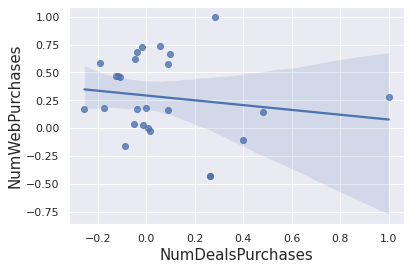

In [ ]:
#graficando el número de compras realizadas por la web al tener una correlación mas cerca de uno.
sns.regplot(x=df.corr(method='spearman')["NumDealsPurchases"], y=df.corr(method='spearman')["NumWebPurchases"])


Se concluye que el número de compras realizas por la web tiene una relación débil con el número de compras realizadas con descuentos.